# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

# **Import all necessary libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

C:\Users\lf05594\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lf05594\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lf05594\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lf05594\AppData\Roaming\Python\Python

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

### THE DATA

** Read in the census_data.csv data with pandas**

In [2]:
data = pd.read_csv('census_data.csv')

In [3]:
data.shape

(32561, 14)

In [4]:
data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [5]:
data.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [6]:
data.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country income_bracket  
0             0              40   United-States          <=50K  
1             0              13   United-States          <=50K  
2             0              40   United-States          <=50K  
3             0              40   United-States          <=50K  
4             0              40            Cuba          <=50K

**Since Tensorflow cann't deak with strings as labels, the "income_bracket" column should be changed to 0s and 1s**

** Convert the Label column to 0s and 1s instead of strings.**

In [7]:
data['income_label'] = data['income_bracket'].apply(lambda x : 1 if x == ' >50K' else 0)

In [8]:
data.head()

age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country income_bracket  income_label  
0             0              40   United-States          <=50K             0  
1             0              13   United-States          <=50K             0  
2             0              40   United-States          <=50K             0  
3             0              40   United-States          <=50K             0  
4             0              40            Cuba          <=50K             0

### Perform a Train Test Split on the Data

In [9]:
#getting the features that will be used as the input
x_data = data.drop(['education_num','income_bracket','income_label'], axis=1)


In [10]:
labels = data['income_label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Create the Feature Columns for tf.esitmator

** Take note of categorical vs continuous values! **

### Continous Columns
- age
- capital_gain
- capital_loss
- hours_per_week

In [12]:
# Normalize continous columns for better efficiency 
cols_to_norm = ['capital_gain','capital_loss','hours_per_week']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [31]:
capital_gain = tf.feature_column.numeric_column('capital_gain')
capital_loss = tf.feature_column.numeric_column('capital_loss')
hours_per_week = tf.feature_column.numeric_column('hours_per_week')
age = tf.feature_column.numeric_column('age')

Change continous column to categorical column

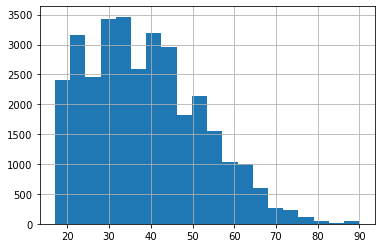

In [34]:
#check the age range within the data set
data['age'].hist(bins=20)

In [35]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80,90])

 - ### Categorical Columns(either use vocabulary list or hash buckets)

In [30]:
# workclass column
# get number of unique values of the class to get the number of needed hash buckets --> (len(data['workclass'].unique().tolist()))

workclass = tf.feature_column.categorical_column_with_hash_bucket('workclass', hash_bucket_size=len(data['workclass'].unique().tolist()))
education = tf.feature_column.categorical_column_with_hash_bucket('education', hash_bucket_size=len(data['education'].unique().tolist()))
marital_status = tf.feature_column.categorical_column_with_hash_bucket('marital_status', hash_bucket_size=len(data['marital_status'].unique().tolist()))
occupation = tf.feature_column.categorical_column_with_hash_bucket('occupation', hash_bucket_size=len(data['occupation'].unique().tolist()))
relationship = tf.feature_column.categorical_column_with_hash_bucket('relationship', hash_bucket_size=len(data['relationship'].unique().tolist()))
race = tf.feature_column.categorical_column_with_hash_bucket('race', hash_bucket_size=len(data['race'].unique().tolist()))
gender = tf.feature_column.categorical_column_with_hash_bucket('gender', hash_bucket_size=len(data['gender'].unique().tolist()))
native_country = tf.feature_column.categorical_column_with_hash_bucket('native_country', hash_bucket_size=len(data['native_country'].unique().tolist()))

- combine all the required features in a list

In [36]:
feat_cols = [capital_gain,capital_loss,hours_per_week,age_buckets,workclass,education,marital_status,occupation,relationship
            ,race,gender,native_country]

### Create Input Function

** Batch_size is up to you. But do make sure to shuffle!**

In [38]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

# Train the model

In [39]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\lf05594\\AppData\\Local\\Temp\\tmpeuq4r51o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015FDD52FC48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Train your model on the data, for at least 5000 steps. **

In [40]:
model.train(input_fn=input_func,steps=5000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\lf05594\AppData\Local\Temp\tmpeuq4r51o\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 165.458
INFO:tensorflow:loss = 839.8004, step = 101 (0.604 sec)
INFO:tensorflow:global_step/sec: 472.955
INFO:tensorflow:loss = 0.3201345, step = 201 (0.212 sec)
INF

# Evaluation

** Create a prediction input function. Remember to only supprt X_test data and keep shuffle=False. **

In [42]:
input_func_eval = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

** Use model.predict() and pass in your input function. This will produce a generator of predictions, which you can then transform into a list, with list() **

In [43]:
# Evaluate the model against the test data to get a glimpse about the model efficiency
results = model.evaluate(input_func_eval)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-11T12:02:20Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\lf05594\AppData\Local\Temp\tmpeuq4r51o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-11-12:02:23
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.81295365, accuracy_baseline = 0.75944537, auc = 0.8474079, auc_precision_recall = 0.62436604, average_loss = 2.1851985, global_step = 5000, label/mean = 0.24055463, loss = 21.843853, precision = 0.6438219, prediction/mean = 0.23206425, recall = 0.49787235
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\lf05594\AppData\Lo

# Prediction
Create a random subset from the data to get the efficiency of the model manually(not optimal solution)

In [95]:
test_data = data.sample(n=1000)

In [96]:
test_features = test_data.drop(['education_num','income_bracket','income_label'], axis=1)
test_labels= test_data['income_label']

In [97]:
input_func_test = tf.estimator.inputs.pandas_input_fn(x=test_features,batch_size=len(test_features),num_epochs=1,shuffle=False)

In [98]:
# put all the classification sin a list
predictions = list(model.predict(input_fn=input_func_test))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lf05594\AppData\Local\Temp\tmpeuq4r51o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [99]:
#Iterate the list to get the final classification value only

final_classification =[] 
for p in predictions:
    final_classification.append(p['class_ids'][0])

In [100]:
print(classification_report(test_labels,final_classification))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       746
           1       0.76      0.10      0.17       254

    accuracy                           0.76      1000
   macro avg       0.76      0.54      0.52      1000
weighted avg       0.76      0.76      0.69      1000



# Try-out DNNclassifer to compare efficiency
Categorical attributes can not be used within a DNNclassifier before turing them in embedded columns


In [106]:
embedded_workclass = tf.feature_column.embedding_column(workclass, dimension=len(data['workclass'].unique().tolist()))
embedded_education = tf.feature_column.embedding_column(education, dimension=len(data['education'].unique().tolist()))
embedded_marital_status = tf.feature_column.embedding_column(marital_status, dimension=len(data['marital_status'].unique().tolist()))
embedded_occupation = tf.feature_column.embedding_column(occupation, dimension=len(data['occupation'].unique().tolist()))
embedded_relationship = tf.feature_column.embedding_column(relationship, dimension=len(data['relationship'].unique().tolist()))
embedded_race = tf.feature_column.embedding_column(race, dimension=len(data['race'].unique().tolist()))
embedded_gender = tf.feature_column.embedding_column(gender, dimension=len(data['gender'].unique().tolist()))
embedded_native_country = tf.feature_column.embedding_column(native_country, dimension=len(data['native_country'].unique().tolist()))

In [107]:
embedded_feat_cols = [capital_gain,capital_loss,hours_per_week,age_buckets,embedded_workclass,embedded_education,
                      embedded_marital_status,embedded_occupation,embedded_relationship,embedded_race,embedded_gender,
                      embedded_native_country]

In [108]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=embedded_feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\lf05594\\AppData\\Local\\Temp\\tmpiefnvboa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015FE5DF4608>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [109]:
dnn_model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\lf05594\AppData\Local\Temp\tmpiefnvboa\model.ckpt.
INFO:tensorflow:loss = 7.809494, step = 1
INFO:tensorflow:global_step/sec: 178.04
INFO:tensorflow:loss = 4.9928484, step = 101 (0.564 sec)
INFO:tensorflow:global_step/sec: 508.97
INFO:tensorflow:loss = 2.9811285, step = 201 (0.196 sec)
INFO:tensorflow:global_step/sec: 533.337
INFO:tensorflow:loss = 5.0953, step = 301 (0.187 sec)
INFO:tensorflow:global_step/sec: 511.567
INFO:tensorflow:loss = 2.7956004, step = 401 (0.196 sec)
INFO:tensorflow:global_step/sec: 451.655
INFO:tensorflow

In [110]:
model.evaluate(input_fn=input_func_eval)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-11T13:02:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\lf05594\AppData\Local\Temp\tmpeuq4r51o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-11-13:02:49
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.81295365, accuracy_baseline = 0.75944537, auc = 0.8474079, auc_precision_recall = 0.62436604, average_loss = 2.1851985, global_step = 5000, label/mean = 0.24055463, loss = 21.843853, precision = 0.6438219, prediction/mean = 0.23206425, recall = 0.49787235
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\lf05594\AppData\Local\Temp\tmpeuq4r51o\model.ckpt-5000


{'accuracy': 0.81295365,
 'accuracy_baseline': 0.75944537,
 'auc': 0.8474079,
 'auc_precision_recall': 0.62436604,
 'average_loss': 2.1851985,
 'label/mean': 0.24055463,
 'loss': 21.843853,
 'precision': 0.6438219,
 'prediction/mean': 0.23206425,
 'recall': 0.49787235,
 'global_step': 5000}

# The DNNclassifier did not show higher efficiency as the data is not that complex to need hidden layers 